# ANN Model Building

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [2]:
df = pd.read_csv('pre_processed.csv')
df1 = pd.read_csv('dataset.csv')

### PreProcessed csv

In [3]:
df.head()

,abdominal pain,abnormal menstruation,acidity,acute liver failure,altered sensorium,anxiety,back pain,belly pain,blackheads,bladder discomfort,...,weakness in limbs,weakness of one body side,weight gain,weight loss,yellow crust ooze,yellow urine,yellowing of eyes,yellowish skin,itching,Disease
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Acne
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Acne
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Hyperthyroidism
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Chronic cholestasis


### Original csv

In [4]:
df1.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,abdominal pain,abnormal menstruation,acidity,acute liver failure,altered sensorium,anxiety,back pain,belly pain,blackheads,bladder discomfort,...,watering from eyes,weakness in limbs,weakness of one body side,weight gain,weight loss,yellow crust ooze,yellow urine,yellowing of eyes,yellowish skin,itching
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.209756,0.048780,0.045122,0.023171,0.023171,0.023171,0.046341,0.023171,0.021951,0.023171,...,0.021951,0.021951,0.021951,0.023171,0.092683,0.023171,0.023171,0.165854,0.185366,0.137805
std,0.407176,0.215431,0.207593,0.150461,0.150461,0.150461,0.210245,0.150461,0.146539,0.150461,...,0.146539,0.146539,0.146539,0.150461,0.290017,0.150461,0.150461,0.371987,0.388634,0.344730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
Y = df['Disease']

#### Ecoding the target label 

In [7]:
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y = np_utils.to_categorical(Y)
Y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
x = df.drop('Disease',axis=1)

In [9]:
x

,abdominal pain,abnormal menstruation,acidity,acute liver failure,altered sensorium,anxiety,back pain,belly pain,blackheads,bladder discomfort,...,watering from eyes,weakness in limbs,weakness of one body side,weight gain,weight loss,yellow crust ooze,yellow urine,yellowing of eyes,yellowish skin,itching
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
df['Disease'].unique().sum()

'AcneHyperthyroidismAIDSChronic cholestasisHypertension HypoglycemiaArthritisHepatitis BMigraineUrinary tract infectionDiabetes Hepatitis DPsoriasisAlcoholic hepatitisDimorphic hemmorhoids(piles)Hepatitis ECervical spondylosisBronchial Asthmahepatitis AAllergyHepatitis CPneumoniaHypothyroidismGastroenteritisVaricose veinsJaundiceDrug Reaction(vertigo) Paroymsal  Positional VertigoHeart attackTuberculosisTyphoidCommon ColdPeptic ulcer diseaeParalysis (brain hemorrhage)Fungal infectionImpetigoGERDDengueMalariaChicken poxOsteoarthristis'

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.30, random_state=42)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3444, 131)
(3444, 41)
(1476, 131)
(1476, 41)


#### Model Building <br/>
basic ann with 4 layers

In [13]:
import keras 
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential


In [14]:
model = Sequential()
model.add(Dense(16, input_shape = (131,) , activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(41, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['acc'] )

history = model.fit(X_train, y_train, epochs = 15 , batch_size=256,validation_split=0.2, shuffle=True)

scores = model.evaluate(X_test,y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2022-06-25 11:44:51.403873: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-25 11:44:51.439478: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-25 11:44:51.440022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-25 11:44:51.440839: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/15
11/11 [==============================] - 2s 20ms/step - loss: 3.7067 - acc: 0.0599 - val_loss: 3.6842 - val_acc: 0.0856
Epoch 2/15
11/11 [==============================] - 0s 5ms/step - loss: 3.6687 - acc: 0.0809 - val_loss: 3.6474 - val_acc: 0.0842
Epoch 3/15
11/11 [==============================] - 0s 5ms/step - loss: 3.6269 - acc: 0.0973 - val_loss: 3.5979 - val_acc: 0.1306
Epoch 4/15
11/11 [==============================] - 0s 5ms/step - loss: 3.5667 - acc: 0.1873 - val_loss: 3.5254 - val_acc: 0.2424
Epoch 5/15
11/11 [==============================] - 0s 5ms/step - loss: 3.4801 - acc: 0.2559 - val_loss: 3.4207 - val_acc: 0.2366
Epoch 6/15
11/11 [==============================] - 0s 5ms/step - loss: 3.3571 - acc: 0.2915 - val_loss: 3.2766 - val_acc: 0.2772
Epoch 7/15
11/11 [==============================] - 0s 5ms/step - loss: 3.1897 - acc: 0.3143 - val_loss: 3.0841 - val_acc: 0.3091
Epoch 8/15
11/11 [==============================] - 0s 4ms/step - loss: 2.9722 - acc: 0.3

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 41)                697       
Total params: 3,881
Trainable params: 3,881
Non-trainable params: 0
_________________________________________________________________


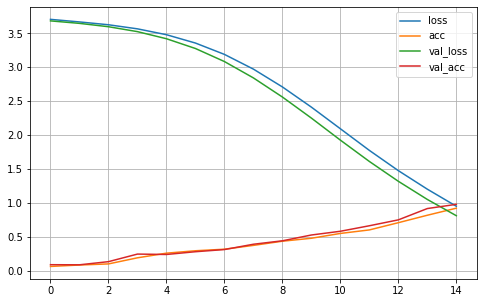

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

traing on stratify data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.30, random_state=1, stratify=Y)

In [18]:
type(y_train)
b = np.sum(y_train,axis=0)
b

array([84., 84., 84., 84., 84., 84., 84., 84., 84., 84., 84., 84., 84.,
       84., 84., 84., 84., 84., 84., 84., 84., 84., 84., 84., 84., 84.,
       84., 84., 84., 84., 84., 84., 84., 84., 84., 84., 84., 84., 84.,
       84., 84.], dtype=float32)

In [19]:
model1 = Sequential()
model1.add(Dense(16, input_shape = (131,) , activation = 'relu'))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(16, activation = 'relu'))
model1.add(Dense(41, activation = 'softmax'))

model1.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['acc'] )

history1=model1.fit(X_train, y_train, epochs = 15,batch_size=256 ,validation_split=0.2, shuffle=True)

scores = model1.evaluate(X_test,y_test)
print("\n%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

Epoch 1/15
11/11 [==============================] - 1s 16ms/step - loss: 3.6899 - acc: 0.0396 - val_loss: 3.6611 - val_acc: 0.0624
Epoch 2/15
11/11 [==============================] - 0s 4ms/step - loss: 3.6398 - acc: 0.0951 - val_loss: 3.6081 - val_acc: 0.1567
Epoch 3/15
11/11 [==============================] - 0s 4ms/step - loss: 3.5768 - acc: 0.1637 - val_loss: 3.5351 - val_acc: 0.1988
Epoch 4/15
11/11 [==============================] - 0s 4ms/step - loss: 3.4906 - acc: 0.1826 - val_loss: 3.4341 - val_acc: 0.2148
Epoch 5/15
11/11 [==============================] - 0s 4ms/step - loss: 3.3725 - acc: 0.2083 - val_loss: 3.3001 - val_acc: 0.1916
Epoch 6/15
11/11 [==============================] - 0s 4ms/step - loss: 3.2189 - acc: 0.2058 - val_loss: 3.1365 - val_acc: 0.2221
Epoch 7/15
11/11 [==============================] - 0s 4ms/step - loss: 3.0371 - acc: 0.2287 - val_loss: 2.9467 - val_acc: 0.2554
Epoch 8/15
11/11 [==============================] - 0s 4ms/step - loss: 2.8276 - acc: 0.2

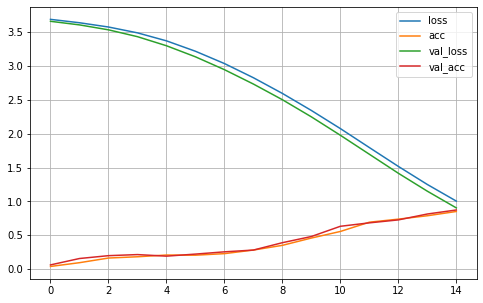

In [20]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [22]:
new_input=[['itching']]

In [24]:
model.predict(new_input)

ValueError: in user code:

    /home/ishu/.local/lib/python3.8/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /home/ishu/.local/lib/python3.8/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/ishu/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/ishu/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/ishu/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/ishu/.local/lib/python3.8/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /home/ishu/.local/lib/python3.8/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /home/ishu/.local/lib/python3.8/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/ishu/.local/lib/python3.8/site-packages/keras/engine/input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 131 but received input with shape (None, 1)


In [57]:
k=x.loc[1]

In [58]:
k

 abdominal pain           0
 abnormal menstruation    0
 acidity                  0
 acute liver failure      0
 altered sensorium        0
                         ..
 yellow crust ooze        0
 yellow urine             0
 yellowing of eyes        0
 yellowish skin           0
itching                   0
Name: 1, Length: 131, dtype: int64

In [65]:
X_train

,abdominal pain,abnormal menstruation,acidity,acute liver failure,altered sensorium,anxiety,back pain,belly pain,blackheads,bladder discomfort,...,watering from eyes,weakness in limbs,weakness of one body side,weight gain,weight loss,yellow crust ooze,yellow urine,yellowing of eyes,yellowish skin,itching
35,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1072,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2339,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2725,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
model.predict(k)

ValueError: in user code:

    /home/ishu/.local/lib/python3.8/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /home/ishu/.local/lib/python3.8/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/ishu/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/ishu/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/ishu/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/ishu/.local/lib/python3.8/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /home/ishu/.local/lib/python3.8/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /home/ishu/.local/lib/python3.8/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/ishu/.local/lib/python3.8/site-packages/keras/engine/input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 131 but received input with shape (None, 1)


In [72]:
li= np.zeros((1,131))

li

In [76]:
li[0]=1

In [77]:
li[0]=1

In [78]:
model.predict(li)

array([[1.55453376e-11, 4.93755988e-06, 3.56989069e-12, 3.14491168e-02,
        4.80878235e-08, 7.17960313e-09, 1.07674529e-10, 1.27717522e-06,
        1.09512120e-17, 2.56492397e-15, 6.27095181e-11, 2.71508793e-09,
        9.67449129e-01, 1.17307719e-14, 1.37133818e-10, 3.65187630e-10,
        8.34336824e-05, 1.28708480e-05, 1.40867373e-09, 3.85364429e-13,
        2.34571368e-13, 1.93652886e-06, 9.12229403e-09, 1.51796683e-11,
        2.00708200e-06, 6.49410081e-10, 1.54010291e-10, 2.79193509e-12,
        1.51769992e-08, 1.88185808e-07, 2.90332139e-07, 4.54724614e-09,
        1.97195590e-07, 4.91761688e-13, 3.72834652e-09, 1.13442894e-07,
        2.17214620e-06, 9.30897386e-06, 9.70506400e-04, 1.23542104e-05,
        6.34456683e-08]], dtype=float32)

In [12]:
df

,abdominal pain,abnormal menstruation,acidity,acute liver failure,altered sensorium,anxiety,back pain,belly pain,blackheads,bladder discomfort,...,weakness in limbs,weakness of one body side,weight gain,weight loss,yellow crust ooze,yellow urine,yellowing of eyes,yellowish skin,itching,Disease
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Acne
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Acne
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Hyperthyroidism
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Chronic cholestasis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Psoriasis
4916,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
4917,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Dengue
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Fungal infection


In [14]:
df.columns

Index([' abdominal pain', ' abnormal menstruation', ' acidity',
       ' acute liver failure', ' altered sensorium', ' anxiety', ' back pain',
       ' belly pain', ' blackheads', ' bladder discomfort',
       ...
       ' weakness in limbs', ' weakness of one body side', ' weight gain',
       ' weight loss', ' yellow crust ooze', ' yellow urine',
       ' yellowing of eyes', ' yellowish skin', 'itching', 'Disease'],
      dtype='object', length=132)

In [17]:
for i in df.columns:
    print("{ label:'"+i+"' , value: '"+i+"'} ,")

{ label:' abdominal pain' , value: ' abdominal pain'} ,
{ label:' abnormal menstruation' , value: ' abnormal menstruation'} ,
{ label:' acidity' , value: ' acidity'} ,
{ label:' acute liver failure' , value: ' acute liver failure'} ,
{ label:' altered sensorium' , value: ' altered sensorium'} ,
{ label:' anxiety' , value: ' anxiety'} ,
{ label:' back pain' , value: ' back pain'} ,
{ label:' belly pain' , value: ' belly pain'} ,
{ label:' blackheads' , value: ' blackheads'} ,
{ label:' bladder discomfort' , value: ' bladder discomfort'} ,
{ label:' blister' , value: ' blister'} ,
{ label:' blood in sputum' , value: ' blood in sputum'} ,
{ label:' bloody stool' , value: ' bloody stool'} ,
{ label:' blurred and distorted vision' , value: ' blurred and distorted vision'} ,
{ label:' breathlessness' , value: ' breathlessness'} ,
{ label:' brittle nails' , value: ' brittle nails'} ,
{ label:' bruising' , value: ' bruising'} ,
{ label:' burning micturition' , value: ' burning micturition'} ,
